READ ME:

Problem:
Predict the pollution for the next hour based on the weather conditions and pollution over the last 24 hours.
Predict the pollution for the next hour as above and given the “expected” weather conditions for the next hour.

Data:

Methodology:

#### 1. Preprocessing : Cleaning & Text Normalization for NLP:
**Lovercase whole tweets**
**Cleaning :**
- remove emojis
- remove links
- remove hashtag sign
- remove 3dots
- remove "rt @"
- remove mentiones
- remove "rt &"data = re.sub(rt_and_patters," ",str(data)) 
- remove "\n"
- fix contractions Can't = cannot
- remove punctuations
- remove digits
**Tokenization & Text Normalizations
- Word Tokens
- Stemming
- Lemmatization
- Remove Stopwords

#### 2. Feature Creation:
- Calculated houry tweet volume database
- BTC historical data merging

#### 3 Sentiment Analysis by TextBlob:
- Subjectivity Score
- Polarity Score
- Created Sentimens (Positive/Neutral/Negative)
- Calculated Sentiment scores with Subjectivity, tweet volume

#### 4. Explorative Data Analysis:
- Checking for Null values
- Checking for outliers
- Chacking for cross corralation

#### 5. Feature Importance: 
Sklearn Libraries
- Mutual_info_regression 
- F_regression
- Random Forest Feature Importance
- RFE(Random Forest )

#### 5. Processed Final Data for MAchine Learning:
- Timeseries DataFrame with selected features


In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import re #used for find and resplace regex expressions
import string #used for get rid of punctuations
import time
import datetime

import contractions
from collections import Counter,OrderedDict

from langdetect import detect # to detect non-english tweets

# NLTK modules necessary for processing data for sentimental analysis
import nltk #used for word tokenizing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.util import ngrams
nltk.download('punkt')
nltk.download('wordnet')
stop_words= set(stopwords.words('english'))
stop_words.remove('not')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud


# correction text tools
from textblob import TextBlob
from spellchecker import SpellChecker

#changing data type from object to ....
from ast import literal_eval



"""Parallelization is achieved by dividing a large chunk of data into smaller chunks and 
these smaller chunks are processed parallelly""" 
import swifter 

""" for parallel processing if the data gets big it will increase functionality"""
import dask.dataframe as dd
from dask.multiprocessing import get


from tqdm.notebook import tqdm
tqdm.pandas()

""" ignoring warnings """
from warnings import filterwarnings
filterwarnings('ignore')

"""This will set the no truncate for Pandas as well as for Dask. 
I am not sure how it does for Dask though, but it works."""

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
#pd.set_option('display.max_colwidth', None)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ozan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ozan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import os  # operating system interface 
print(os.getcwd())

C:\Users\Ozan\Desktop\DS\PostgreSQLPython\Notebook


# Twitter Data 

In [3]:
# path for data folder
file = 'C:\\Users\\Ozan\\Desktop\\DS\\PostgreSQLPython\\Notebook\\data\\'

#List of all the documents in the folder:
!ls C:\\Users\\Ozan\\Desktop\\DS\\PostgreSQLPython\\Notebook\\data

#btc_twitter_data_10
#deprem  since
#deprem OR #enkazaltindayiz  since
#deprem OR #enkazaltindayiz  since_time
#deprem OR #enkazaltindayiz  until
#deprem OR #enkazaltindayiz  until_time
#deprem OR #enkazaltindayiz_twitter_data_10
#deprem until_time=1675645855 since_time
#deprem_twitter_data_10
#python_twitter_data_10
#rifathisarciklioglu.csv
#rifathisarciklioglu_twitter_data_10
#tobb.csv
(#deprem OR #enkazaltÄ±ndayÄ±m) until_time=1675645855 since_time
(#deprem OR #enkazaltÄ±ndayÄ±m) until_time={1675645855} since_time
+#polkadot OR #dot_4000
100000_tweets.csv
100000_tweets.xlsx
Bitcoin_tweets.csv.zip
Bitcoin_tweets_dataset_2.csv.zip
Bitcoin_tweets_dataset_2.csv~
Bitcoin_tweets_dataset_2_val.csv
Bitcoin_weets.csv
ML_tweet_feature_Selected_data.csv
Tweet_and_BTC_merged_data.csv
Tweet_and_BTC_merged_data_w_scores.csv
_#polkadot_4000
all_polkadot.csv
btc_03062023.csv
btc_1d_20230206_20230214
btc_1h_20210205_20210624.csv
btc_1h_20210205_20210624_full.csv
btc_1h_2021029_20210623
btc_1h_202302

In [23]:
#load first 200.000 rows from the data

df = pd.read_csv(file+'Bitcoin_tweets_dataset_2_val.csv', parse_dates= ['date'], nrows= 100)

In [24]:
print("Raw data size : " , df.shape)
print("Raw data information : ",(df.info()))

Raw data size :  (100, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_name         100 non-null    object        
 1   user_location     54 non-null     object        
 2   user_description  94 non-null     object        
 3   user_created      100 non-null    object        
 4   user_followers    100 non-null    int64         
 5   user_friends      100 non-null    int64         
 6   user_favourites   100 non-null    int64         
 7   user_verified     100 non-null    bool          
 8   date              100 non-null    datetime64[ns]
 9   text              100 non-null    object        
 10  hashtags          100 non-null    object        
 11  source            100 non-null    object        
 12  is_retweet        100 non-null    bool          
dtypes: bool(2), datetime64[ns](1), int64(3), object(7)
mem

In [25]:
# Filter features from raw data 

df_text= df[['date', 'text']]
df_text = pd.DataFrame(df_text)

In [26]:
df_text.head()

,date,text
0,2023-03-01 23:59:59,Which #bitcoin books should I think about read...
1,2023-03-01 23:59:47,"@ThankGodForBTC I appreciate the message, but ..."
2,2023-03-01 23:59:42,#Ethereum price update: \n\n#ETH $1664.02 USD\...
3,2023-03-01 23:59:36,CoinDashboard v3.0 is here\nAvailable on ios a...
4,2023-03-01 23:59:32,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...


In [27]:
df_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    100 non-null    datetime64[ns]
 1   text    100 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 1.7+ KB


In [30]:
df_tweet = df_text.copy()

In [31]:
# check for empty cells
df_tweet.isnull().sum()

date    0
text    0
dtype: int64

In [32]:
# Query some properties of the data
print('Dimensionality of the data is {}'.format(df_tweet.shape))  # .shape returns a tupel
print('The data set has {} cases.'.format(df_tweet.shape[0]))     # we can also index the elements of that tupel
print('The total number of elements is {}.'.format(df_tweet.size))

Dimensionality of the data is (100, 2)
The data set has 100 cases.
The total number of elements is 200.


In [33]:
df_tweet.rename(columns = {'text':'tweet'}, inplace = True)

In [34]:
df_tweet.head()

,date,tweet
0,2023-03-01 23:59:59,Which #bitcoin books should I think about read...
1,2023-03-01 23:59:47,"@ThankGodForBTC I appreciate the message, but ..."
2,2023-03-01 23:59:42,#Ethereum price update: \n\n#ETH $1664.02 USD\...
3,2023-03-01 23:59:36,CoinDashboard v3.0 is here\nAvailable on ios a...
4,2023-03-01 23:59:32,#Bitcoin Short Term Fractal (4H)💥\n\nIn lower ...


# 1. Cleaning & Text Normalization for NLP:
First, by using NLP techniques, the text has been cleaned, parsed, and removed all the
stopwords, hashtags, links, and other unnecessary information, have been applied on
it in order to get a plain text which contains only the most important tokens for the ML
classifier, and a text with less capacity required

In [35]:
# Text lowercase 
df_tweet['tweet'] = df_tweet['tweet'].str.lower()

# Change date column type into datetime
#df_tweet['date'] = pd.to_datetime(df_tweet['date'])

### 1.1 Cleaning

- #### Patterns for  subtractions:

In [36]:

# https://en.wikipedia.org/wiki/Unicode_block
emoji_pattern = re.compile(
    "["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "\U000024C2-\U0001F251" 
    "]+"
)

tag_pattern = re.compile("(?:\#)\S+") #hashtag pattern

rt_mention_pattern = re.compile("rt @[A-Za-z0-9_:]+") #rt @ pattern

mentioned_pattern = re.compile("(?:\@)\S+") # @mention pattern

links_pattern = re.compile("http\S+|www\S+|https\S+") #http/https etc. pattern

digits_pattern = re.compile("\w*\d+\w*") #removes all numbers 

rt_and_pattern= re.compile("rt &[A-Za-z0-9_;]+") #removes "rt &"" pattern 


- #### Cleaning function: 
    Returns clean tweets, free from emojis, hastags,mentions,punctiotions,digits + fixed contractions

In [37]:
translator = str.maketrans(" "," ",string.punctuation)
start= time.time()
def cleaning_tweet(data):
    data = re.sub(emoji_pattern," ",str(data))             # remove emojis
    data = re.sub(links_pattern," ",str(data))             # remove links
    data = str(data).replace("#","")                        # remove hashtag sign
    data = str(data).replace("...","")                        # remove 3dots
    data = re.sub(rt_mention_pattern," ",str(data))        # remove "rt @"
    data = re.sub(mentioned_pattern," ",str(data))         # remove mentiones
    data = re.sub(rt_and_pattern," ",str(data))            # remove "rt &"data = re.sub(rt_and_patters," ",str(data)) 
    data = str(data).replace("\n"," ")                     # remove "\n"
    data = contractions.fix(data)                          #fix contractions Can't = cannot
    data = data.translate(translator)                      # remove punctuations
    data = " ".join([w for w in data.split() if not w.isdigit()]) # remove digits
    return data
    
df_tweet['clean_tweet'] = df_tweet['tweet'].apply(lambda x: cleaning_tweet(x))                 
end = time.time()
print("Cleaning tweet process: ", end-start)

Cleaning tweet process:  0.004022121429443359


In [38]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         100 non-null    datetime64[ns]
 1   tweet        100 non-null    object        
 2   clean_tweet  100 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 2.5+ KB


In [39]:
df_tweet.head(3)

,date,tweet,clean_tweet
0,2023-03-01 23:59:59,which #bitcoin books should i think about read...,which bitcoin books should i think about readi...
1,2023-03-01 23:59:47,"@thankgodforbtc i appreciate the message, but ...",i appreciate the message but not a fan of the ...
2,2023-03-01 23:59:42,#ethereum price update: \n\n#eth $1664.02 usd\...,ethereum price update eth usd bitcoin btc foll...


### 1.2 Text Normalization:

- #### Tokenization : Creates word tokens from clean text

In [40]:

start= time.time()
df_tweet['tokens'] = df_tweet['clean_tweet'].apply(word_tokenize)
df_tweet.sample(3)
end = time.time()

print("tokenization process: ", end-start)
df_tweet.sample(2)

tokenization process:  0.010997533798217773


,date,tweet,clean_tweet,tokens
58,2023-03-01 23:54:30,if you need a hacker for any kind of problem c...,if you need a hacker for any kind of problem c...,"[if, you, need, a, hacker, for, any, kind, of,..."
31,2023-03-01 23:56:40,#binancecoin price update: $bnb\n\n#bnb $302.9...,binancecoin price update bnb bnb usd bitcoin b...,"[binancecoin, price, update, bnb, bnb, usd, bi..."


- #### Stemming:

In [41]:
start= time.time()

ps = PorterStemmer()
df_tweet['stemmed'] = df_tweet['tokens'].apply(lambda x: [ps.stem(w) for w in x])

end = time.time()

print("stemming process: ", end-start)
df_tweet.sample(2)

stemming process:  0.015657901763916016


,date,tweet,clean_tweet,tokens,stemmed
66,2023-03-01 23:53:15,💰 market cap. swap 💰 what would one #maiar-dex...,market cap swap what would one maiardex mex co...,"[market, cap, swap, what, would, one, maiardex...","[market, cap, swap, what, would, one, maiardex..."
31,2023-03-01 23:56:40,#binancecoin price update: $bnb\n\n#bnb $302.9...,binancecoin price update bnb bnb usd bitcoin b...,"[binancecoin, price, update, bnb, bnb, usd, bi...","[binancecoin, price, updat, bnb, bnb, usd, bit..."


- #### Lemmatization:

In [42]:


start= time.time()

lem= WordNetLemmatizer()
df_tweet['lemmatized'] = df_tweet['tokens'].apply(lambda x: [lem.lemmatize(w) for w in x])

end = time.time()
print("Lemmatizing process: ", end-start) 
df_tweet.sample(2)

Lemmatizing process:  0.005982637405395508


,date,tweet,clean_tweet,tokens,stemmed,lemmatized
43,2023-03-01 23:56:04,phrozenkhaos found #bitcoin in a green vault a...,phrozenkhaos found bitcoin in a green vault at...,"[phrozenkhaos, found, bitcoin, in, a, green, v...","[phrozenkhao, found, bitcoin, in, a, green, va...","[phrozenkhaos, found, bitcoin, in, a, green, v..."
65,2023-03-01 23:53:26,this made me giggle because.... the u.s. doesn...,this made me giggle because the yous does not ...,"[this, made, me, giggle, because, the, yous, d...","[thi, made, me, giggl, becaus, the, you, doe, ...","[this, made, me, giggle, because, the, yous, d..."


- #### Removing Stopwords:

In [43]:
#Remove stopwords

start = time.time()

df_tweet['normalized_tokens'] = df_tweet['lemmatized'].apply(lambda x :" ".join ([word for word in x if word not in stop_words]))

end = time.time()
print(end-start)    


df_tweet.sample(3)


0.0009975433349609375


,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens
68,2023-03-01 23:53:06,how often do you buy #bitcoin?,how often do you buy bitcoin,"[how, often, do, you, buy, bitcoin]","[how, often, do, you, buy, bitcoin]","[how, often, do, you, buy, bitcoin]",often buy bitcoin
69,2023-03-01 23:53:03,"🟩 block 778891 ⛏ ⛏\n\n📅 1st mar 2023, 23:52:15...",block 1st mar gmt tx with a value of ₿ 10284m ...,"[block, 1st, mar, gmt, tx, with, a, value, of,...","[block, 1st, mar, gmt, tx, with, a, valu, of, ...","[block, 1st, mar, gmt, tx, with, a, value, of,...",block 1st mar gmt tx value ₿ 10284m distribute...
43,2023-03-01 23:56:04,phrozenkhaos found #bitcoin in a green vault a...,phrozenkhaos found bitcoin in a green vault at...,"[phrozenkhaos, found, bitcoin, in, a, green, v...","[phrozenkhao, found, bitcoin, in, a, green, va...","[phrozenkhaos, found, bitcoin, in, a, green, v...",phrozenkhaos found bitcoin green vault locatio...


#### - Save clean tweet

In [44]:
df_tweet.to_csv(file+'clean_tweet_kaggledataset.csv',index = False)

In [45]:
df = pd.read_csv(file+'clean_tweet_kaggledataset.csv')
clean_tweet = df.copy()
clean_tweet.head(2)

,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens
0,2023-03-01 23:59:59,which #bitcoin books should i think about read...,which bitcoin books should i think about readi...,"['which', 'bitcoin', 'books', 'should', 'i', '...","['which', 'bitcoin', 'book', 'should', 'i', 't...","['which', 'bitcoin', 'book', 'should', 'i', 't...",bitcoin book think reading next
1,2023-03-01 23:59:47,"@thankgodforbtc i appreciate the message, but ...",i appreciate the message but not a fan of the ...,"['i', 'appreciate', 'the', 'message', 'but', '...","['i', 'appreci', 'the', 'messag', 'but', 'not'...","['i', 'appreciate', 'the', 'message', 'but', '...",appreciate message not fan religious reference...


- #### Filter Non-English tweets

In [46]:
# function for language detection will be applied to all tweets

from langdetect import detect
lang = []
sentence = ''
def find_lang(data):
    try:
        sentence = detect(data)
    except:
        sentence = 'unknown'
    return sentence
start = time.time()
clean_tweet['lang'] = clean_tweet['tweet'].apply(lambda x: find_lang(x))
end = time.time()

print("language detection process: ", end-start)

language detection process:  0.7462854385375977


In [47]:
clean_tweet.to_csv(file+'clean_tweet_lan_kaggledataset.csv',index = False)
clean_tweet = pd.read_csv(file+'clean_tweet_lan_kaggledataset.csv')
clean_tweet_lang = clean_tweet.copy()
clean_tweet_lang.head(2)

,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens,lang
0,2023-03-01 23:59:59,which #bitcoin books should i think about read...,which bitcoin books should i think about readi...,"['which', 'bitcoin', 'books', 'should', 'i', '...","['which', 'bitcoin', 'book', 'should', 'i', 't...","['which', 'bitcoin', 'book', 'should', 'i', 't...",bitcoin book think reading next,en
1,2023-03-01 23:59:47,"@thankgodforbtc i appreciate the message, but ...",i appreciate the message but not a fan of the ...,"['i', 'appreciate', 'the', 'message', 'but', '...","['i', 'appreci', 'the', 'messag', 'but', 'not'...","['i', 'appreciate', 'the', 'message', 'but', '...",appreciate message not fan religious reference...,en


In [48]:
clean_tweet_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               100 non-null    object
 1   tweet              100 non-null    object
 2   clean_tweet        100 non-null    object
 3   tokens             100 non-null    object
 4   stemmed            100 non-null    object
 5   lemmatized         100 non-null    object
 6   normalized_tokens  100 non-null    object
 7   lang               100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


### - Drop empty tokens

In [49]:
clean_tweet_lang = clean_tweet_lang.dropna(subset='normalized_tokens')

In [50]:
clean_tweet_lang[clean_tweet_lang.normalized_tokens.isnull()]

,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens,lang


### - Top 10 tweet languages

In [51]:
clean_tweet.lang.value_counts()[:9]

en    98
cy     1
it     1
Name: lang, dtype: int64

### - Filter only english tweets

In [52]:
df_clean_filtered_tweet = clean_tweet_lang[clean_tweet_lang['lang']=='en']

In [53]:
df_clean_filtered_tweet.head(2)

,date,tweet,clean_tweet,tokens,stemmed,lemmatized,normalized_tokens,lang
0,2023-03-01 23:59:59,which #bitcoin books should i think about read...,which bitcoin books should i think about readi...,"['which', 'bitcoin', 'books', 'should', 'i', '...","['which', 'bitcoin', 'book', 'should', 'i', 't...","['which', 'bitcoin', 'book', 'should', 'i', 't...",bitcoin book think reading next,en
1,2023-03-01 23:59:47,"@thankgodforbtc i appreciate the message, but ...",i appreciate the message but not a fan of the ...,"['i', 'appreciate', 'the', 'message', 'but', '...","['i', 'appreci', 'the', 'messag', 'but', 'not'...","['i', 'appreciate', 'the', 'message', 'but', '...",appreciate message not fan religious reference...,en


In [54]:
df_clean_filtered_tweet.to_csv(file+'clean_tweet_eng_kaggledataset.csv',index = False)

In [55]:
clean_tweet_en = df_clean_filtered_tweet.copy()
clean_tweet_en = clean_tweet_en.drop(['tweet', 'clean_tweet', 'tokens', 'stemmed', 'lemmatized','lang'], axis=1)
clean_tweet_en.head(2)

,date,normalized_tokens
0,2023-03-01 23:59:59,bitcoin book think reading next
1,2023-03-01 23:59:47,appreciate message not fan religious reference...


In [56]:
print("Processed english tweet data size : ", len(clean_tweet_en))

Processed english tweet data size :  98


# 2. Sentiment Analysis:

Tweets sentiment analysis will be performed with unsupervised learning model Textblob. Polarity (-1,1) and Subjectivity (0,1) scores will be created for each normalized_token tweets

*The deep learning NLP Bert model is also considered to use for sentiment analysis however was not performed in this study due to slower processing power

In [57]:
#TEXT BLOB

#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Create a function to get sentiments based on polarity score

def getSentiments(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

start= time.time()
#Text_Blob subjectivity score    
clean_tweet_en['subjectivity'] = clean_tweet_en['normalized_tokens'].apply(lambda x: getSubjectivity(x)) #
#Text_Blob polarity score
clean_tweet_en['polarity'] = clean_tweet_en['normalized_tokens'].apply(getPolarity)
#Sentiments based on polarity score
clean_tweet_en['sentiments'] = clean_tweet_en['polarity'].apply(getSentiments )
end = time.time()
print("Sentiment Analysis pocess :", end-start)
clean_tweet_en.sample(3)

Sentiment Analysis pocess : 0.058785438537597656


,date,normalized_tokens,subjectivity,polarity,sentiments
9,2023-03-01 23:59:08,first bitcoin halving age humble time,0.366667,0.025,Positive
21,2023-03-01 23:57:37,bitcoin fun fact period day red candle monthly...,0.100000,0.150,Positive
54,2023-03-01 23:54:38,bitcoin next sanrio link crypto cryptoart cryp...,0.000000,0.000,Neutral


In [58]:
df_tweet_sentiments = clean_tweet_en.copy()

#### - Save normalized english tokens data

In [59]:
clean_tweet_en.to_csv(file+'clean_tweet_eng_sentiments_kaggledataset.csv',index = False)
df_tweet_sentiments = pd.read_csv(file+'clean_tweet_eng_sentiments_kaggledataset.csv')
processed_tweet = df_tweet_sentiments.copy()
processed_tweet.head(2)

,date,normalized_tokens,subjectivity,polarity,sentiments
0,2023-03-01 23:59:59,bitcoin book think reading next,0.00,0.0,Neutral
1,2023-03-01 23:59:47,appreciate message not fan religious reference...,0.25,0.0,Neutral


#### - Distribution of sentiments

In [60]:
processed_tweet.sentiments.value_counts()

Neutral     55
Positive    35
Negative     8
Name: sentiments, dtype: int64

<BarContainer object of 3 artists>

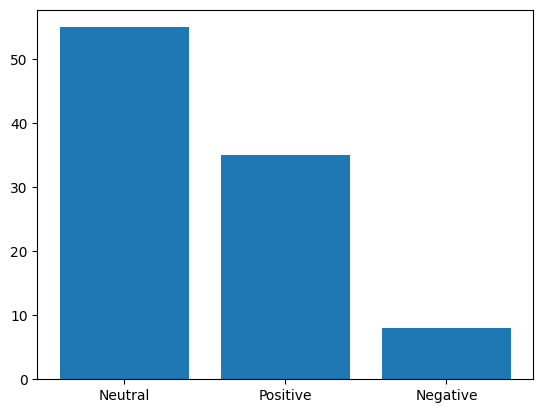

In [61]:
plt.bar(processed_tweet.sentiments.value_counts().index,processed_tweet.sentiments.value_counts())

In [62]:
processed_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               98 non-null     object 
 1   normalized_tokens  98 non-null     object 
 2   subjectivity       98 non-null     float64
 3   polarity           98 non-null     float64
 4   sentiments         98 non-null     object 
dtypes: float64(2), object(3)
memory usage: 4.0+ KB


In [63]:
tweet_score = processed_tweet.copy()
tweet_score.head()

,date,normalized_tokens,subjectivity,polarity,sentiments
0,2023-03-01 23:59:59,bitcoin book think reading next,0.00,0.00,Neutral
1,2023-03-01 23:59:47,appreciate message not fan religious reference...,0.25,0.00,Neutral
2,2023-03-01 23:59:42,ethereum price update eth usd bitcoin btc foll...,0.25,0.00,Neutral
3,2023-03-01 23:59:36,coindashboard v30 available io android bitcoin,0.40,0.40,Positive
4,2023-03-01 23:59:32,bitcoin short term fractal 4h lower timeframe ...,0.20,0.05,Positive


### - Summary statistics for numerical variables

In [64]:
tweet_score.describe()

,subjectivity,polarity
count,98.000000,98.000000
mean,0.294486,0.110327
std,0.297599,0.259925
min,0.000000,-0.325000
25%,0.000000,0.000000
50%,0.250000,0.000000
75%,0.493750,0.146875
max,1.000000,1.000000


- Drop str object from date column to set as datetime object

In [65]:
tweet_score.date.sort_values(ascending=False)

0     2023-03-01 23:59:59
1     2023-03-01 23:59:47
2     2023-03-01 23:59:42
3     2023-03-01 23:59:36
4     2023-03-01 23:59:32
             ...         
93    2023-03-01 23:50:17
94    2023-03-01 23:50:06
95    2023-03-01 23:50:01
96    2023-03-01 23:50:01
97    2023-03-01 23:50:00
Name: date, Length: 98, dtype: object

In [67]:
#tweet_score = tweet_score.drop(index=[134580,177249,63273])

In [68]:
tweet_score['datetime'] = pd.to_datetime(tweet_score['date'])
tweet_score = tweet_score.sort_values(by= 'datetime', ascending= False)
tweet_score['datetime'] = tweet_score['datetime'].dt.floor('h')
tweet_score.head(2)

,date,normalized_tokens,subjectivity,polarity,sentiments,datetime
0,2023-03-01 23:59:59,bitcoin book think reading next,0.00,0.0,Neutral,2023-03-01 23:00:00
1,2023-03-01 23:59:47,appreciate message not fan religious reference...,0.25,0.0,Neutral,2023-03-01 23:00:00


### - Hourly Tweet Sentiment Summary

In [69]:
tweet_score_statistics = tweet_score.groupby('datetime').describe()
tweet_score_statistics

subjectivity                                               \
                           count      mean       std  min  25%   50%      75%   
datetime                                                                        
2023-03-01 23:00:00         98.0  0.294486  0.297599  0.0  0.0  0.25  0.49375   

                         polarity                                       \
                     max    count      mean       std    min  25%  50%   
datetime                                                                 
2023-03-01 23:00:00  1.0     98.0  0.110327  0.259925 -0.325  0.0  0.0   

                                    
                          75%  max  
datetime                            
2023-03-01 23:00:00  0.146875  1.0

In [709]:
tweet_score.head()

,date,normalized_tokens,subjectivity,polarity,sentiments,datetime
126064,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive,2021-06-23 19:00:00
126065,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive,2021-06-23 19:00:00
126066,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral,2021-06-23 19:00:00
126067,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive,2021-06-23 19:00:00
126069,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive,2021-06-23 19:00:00


In [710]:
print("tweets' data time-range : from ", tweet_score.datetime.iloc[0], " to ", tweet_score.datetime.iloc[-1] )

tweets' data time-range : from  2021-06-23 19:00:00  to  2021-02-05 10:00:00


- Prepare tweet score data to merge: Set datetime as index

In [712]:
tweet_score.index = pd.to_datetime(tweet_score.index)
tweet_score=tweet_score.set_index('datetime')
tweet_score.index.names = ['datetime']
tweet_score.head()

,date,normalized_tokens,subjectivity,polarity,sentiments
datetime,,,,,
2021-06-23 19:00:00,2021-06-23 19:29:37,turtle finance ready fly turtlefinancetoken tu...,0.633333,0.500000,Positive
2021-06-23 19:00:00,2021-06-23 19:29:35,btcusd current bitcoin price day high day low ...,0.411429,0.002857,Positive
2021-06-23 19:00:00,2021-06-23 19:29:33,official eshop airdrop missed meme token rally...,0.000000,0.000000,Neutral
2021-06-23 19:00:00,2021-06-23 19:29:31,exactly bitcoin welcome,0.575000,0.525000,Positive
2021-06-23 19:00:00,2021-06-23 19:29:21,true degenerate miss rip bitcoin,0.650000,0.350000,Positive
